<a href="https://colab.research.google.com/github/Oopirata/PraktikumMachineLearning/blob/main/Tugas3_Hanif_Herofa_PMB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Hanif Herofa<br>
NIM   : 24060122120015

Nama Dataset : Abalone <br>
URL          : "https://archive.ics.uci.edu/dataset/1/abalone"

# Tugas 3

In [53]:
# Import library dasar
import pylab
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from collections import Counter

# Import library untuk clustering dan visualisasi
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

# Import library untuk reduksi dimensi dan dataset
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

In [54]:
# Baca dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
         'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
dataset = pd.read_csv(url, names=names)

# Preprocessing: pilih fitur numerik dan standardisasi
numeric_features = dataset.select_dtypes(include=['float64', 'int64']).columns
X = dataset[numeric_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Fungsi untuk membuat dendrogram
def plot_dendrogram(linkage_matrix, title):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

#1. Teknik Agglomerative untuk Dataset Random


In [56]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

In [57]:
# Menampilkan dimensi generate data
X1.shape

(50, 2)

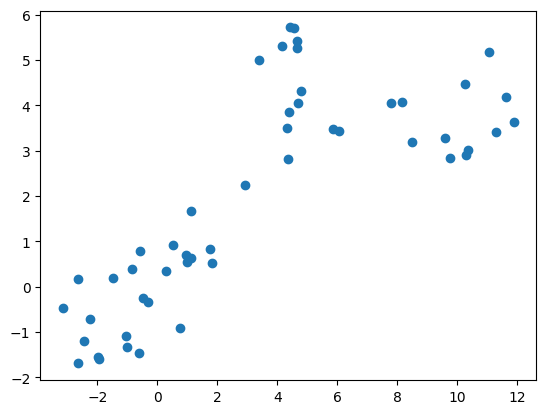

In [58]:
# Plotting Random Data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [59]:
# Inisialisasi objek AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

# Melatih model pengelompokan pada dataset
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

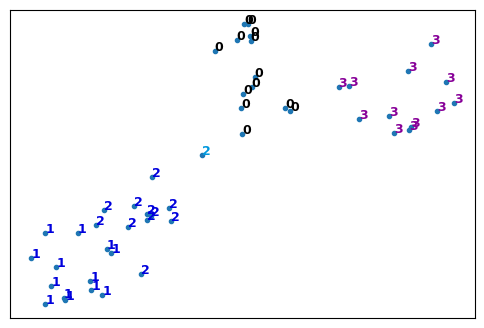

In [60]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]) :
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight' : 'bold', 'size' : 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

In [61]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.15453732 0.83995998 ... 0.16207051 0.82914263 1.06108543]
 [0.15453732 0.         0.94728407 ... 0.30723486 0.93560904 1.18737546]
 [0.83995998 0.94728407 0.         ... 0.69201745 0.01316745 0.29818541]
 ...
 [0.16207051 0.30723486 0.69201745 ... 0.         0.68190571 0.90167316]
 [0.82914263 0.93560904 0.01316745 ... 0.68190571 0.         0.31097452]
 [1.06108543 1.18737546 0.29818541 ... 0.90167316 0.31097452 0.        ]]


In [62]:
# Memberikan parameter pada kelas linkage dari hierarki
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-62-cc9c708ec4ba>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-62-cc9c708ec4ba>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')
<ipython-input-62-cc9c708ec4ba>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


Text(0.5, 1.0, 'Single Linkage')

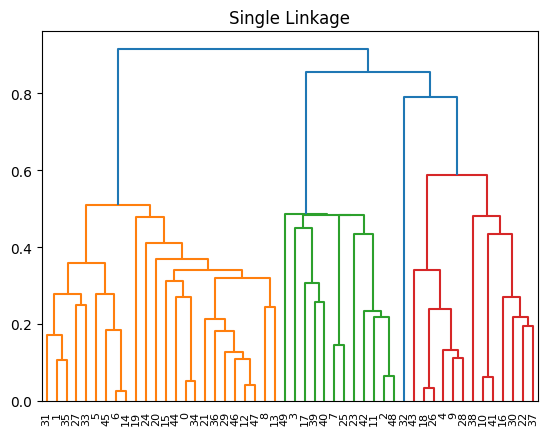

In [63]:
# Single Linkage
dendroX = hierarchy.dendrogram(X)
plt.title("Single Linkage")

Text(0.5, 1.0, 'Average Linkage')

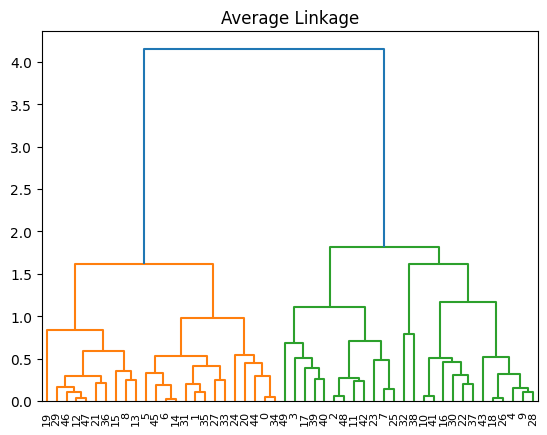

In [64]:
# Average Linkage
dendroY = hierarchy.dendrogram(Y)
plt.title("Average Linkage")

Text(0.5, 1.0, 'Complete Linkage')

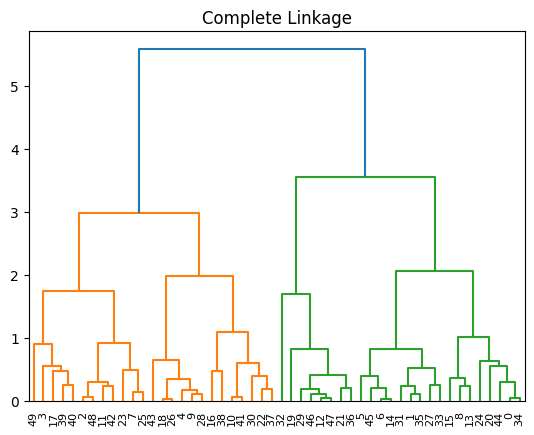

In [65]:
# Complete Linkage
dendroZ = hierarchy.dendrogram(Z)
plt.title("Complete Linkage")

#2. Teknik Agglomerative untuk Cars Clustering

In [66]:
pdf = pd.read_csv("/content/drive/MyDrive/cars_clus.csv")

In [67]:
# Menampilkan dimensi dataset
pdf.shape

(159, 16)

In [68]:
# Menampilkan 10 data teratas
pdf.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0
5,Audi,A6,18.78,23.555,0,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,2.933,0
6,Audi,A8,1.38,39,0,62,4.2,310,113,74,198.2,3.902,23.7,21,0.322,0
7,BMW,323i,19.747,$null$,0,26.99,2.5,170,107.3,68.4,176,3.179,16.6,26.1,2.983,0
8,BMW,328i,9.231,28.675,0,33.4,2.8,193,107.3,68.5,176,3.197,16.6,24,2.223,0
9,BMW,528i,17.527,36.125,0,38.9,2.8,193,111.4,70.9,188,3.472,18.5,24.8,2.864,0


In [69]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['sales', 'resale', 'type','price','engine_s','horsepow','wheelbas','width',
      'length','curb_wgt','fuel_cap','mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0


In [70]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


In [71]:
# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [72]:
# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = np.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [73]:
# Complete Linkage
Z = hierarchy.linkage(D, 'complete')

<ipython-input-73-1190c8367043>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [74]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Complete Linkage


array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [75]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Complete Linkage


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

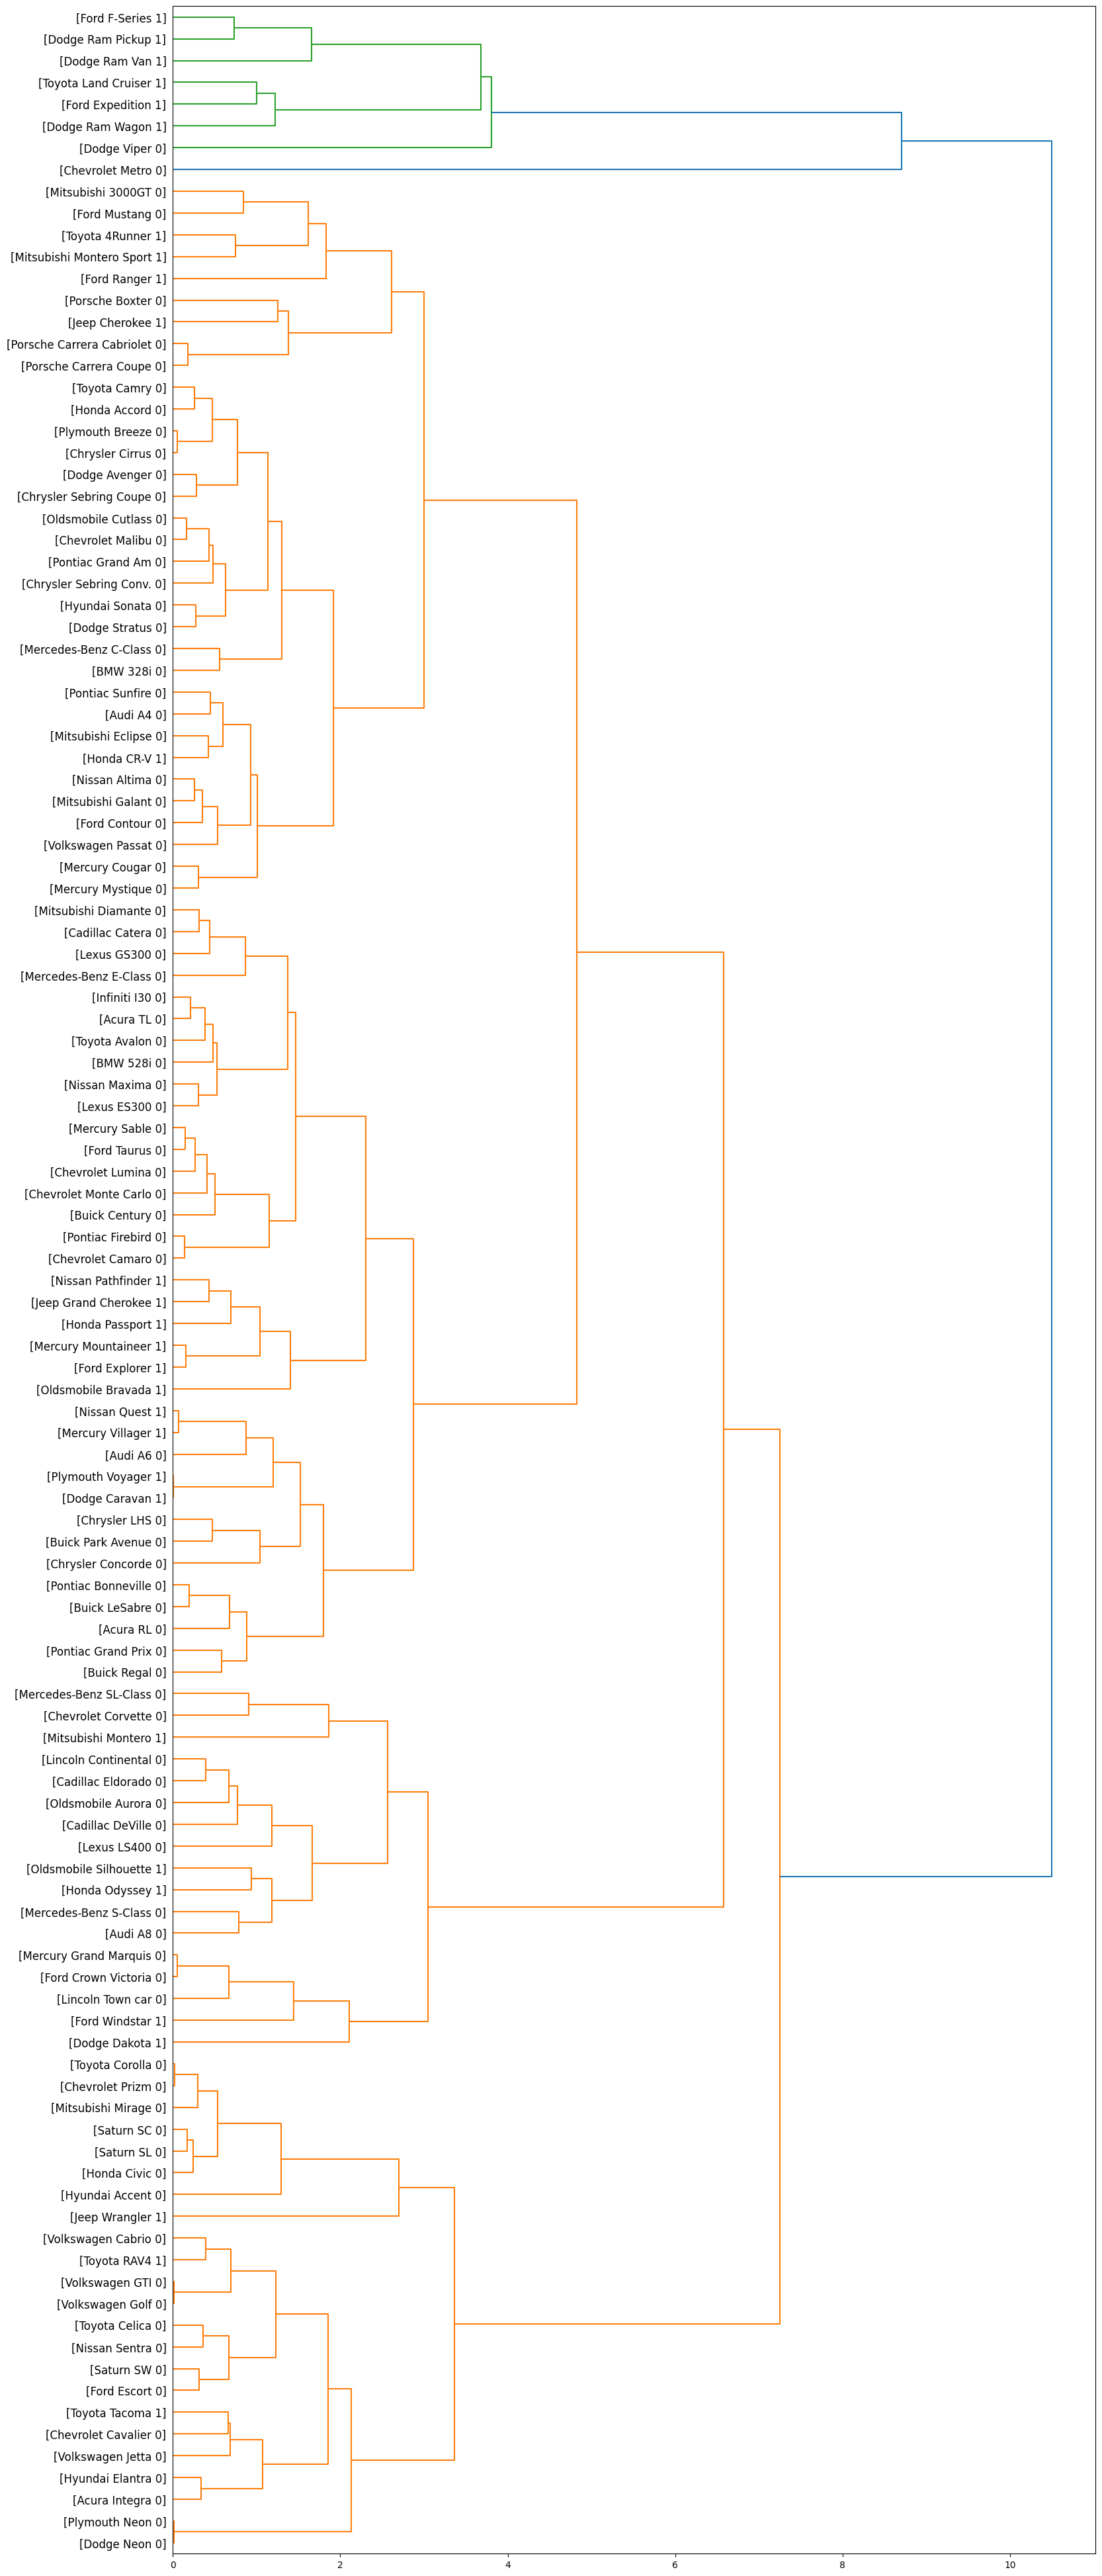

In [76]:
# Complete Dendogram

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [77]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [78]:
# Complete Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [79]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,2


<ipython-input-80-09f7eebf4f10>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

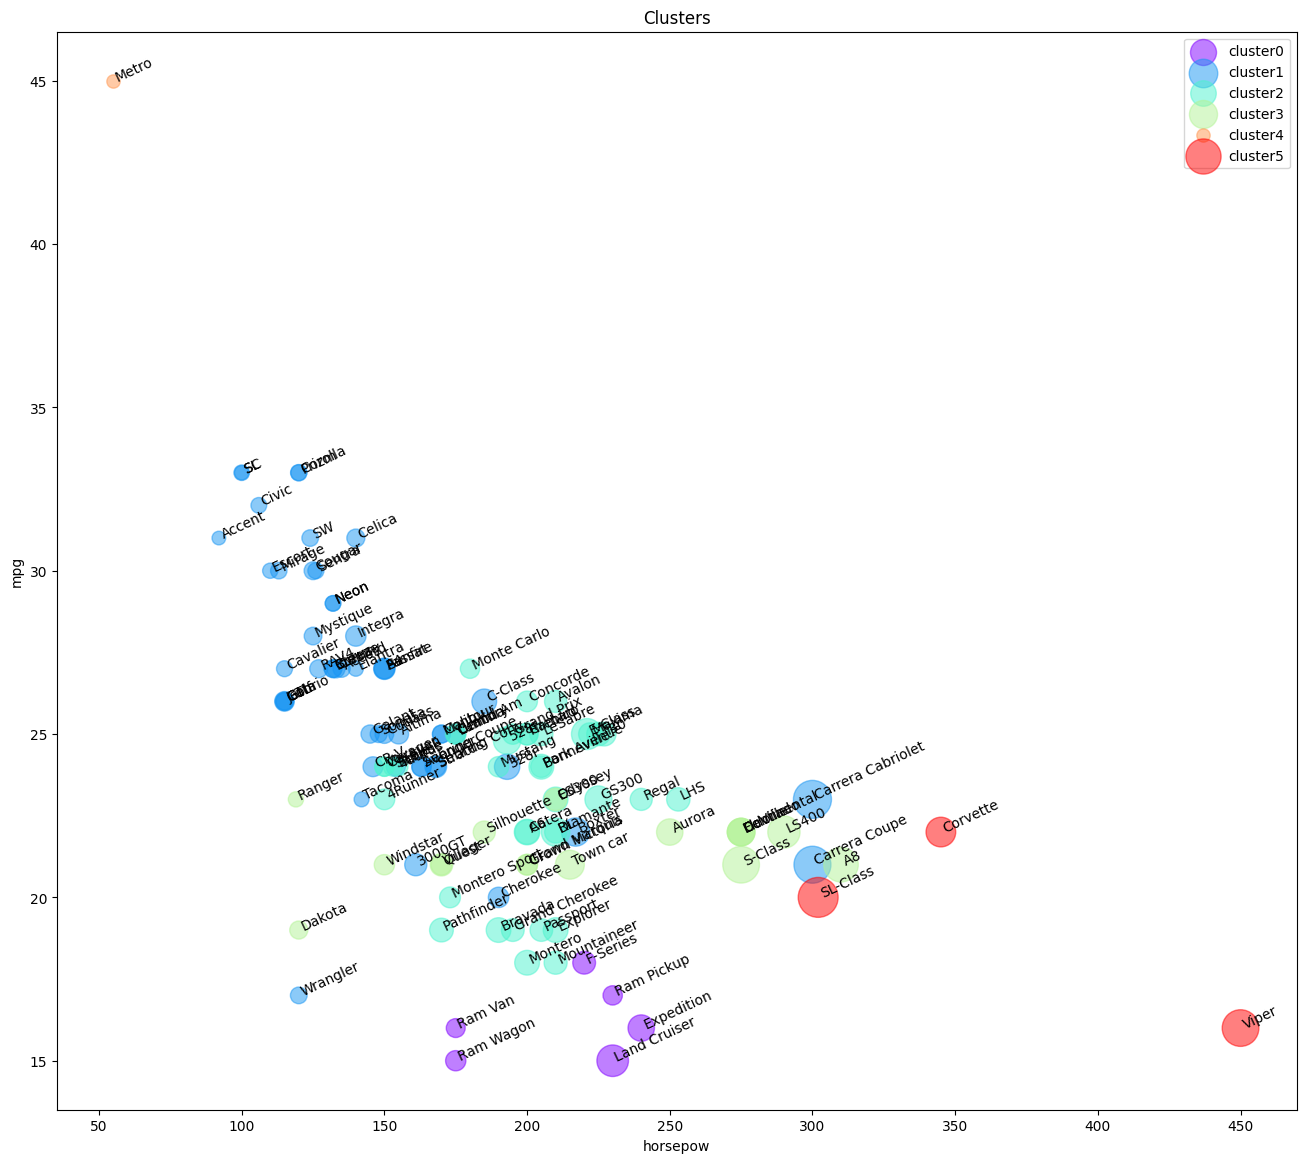

In [80]:
# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [81]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [82]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean() # Changed tuple to list
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

<ipython-input-83-eef09f8da310>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
<ipython-input-83-eef09f8da310>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'mpg')

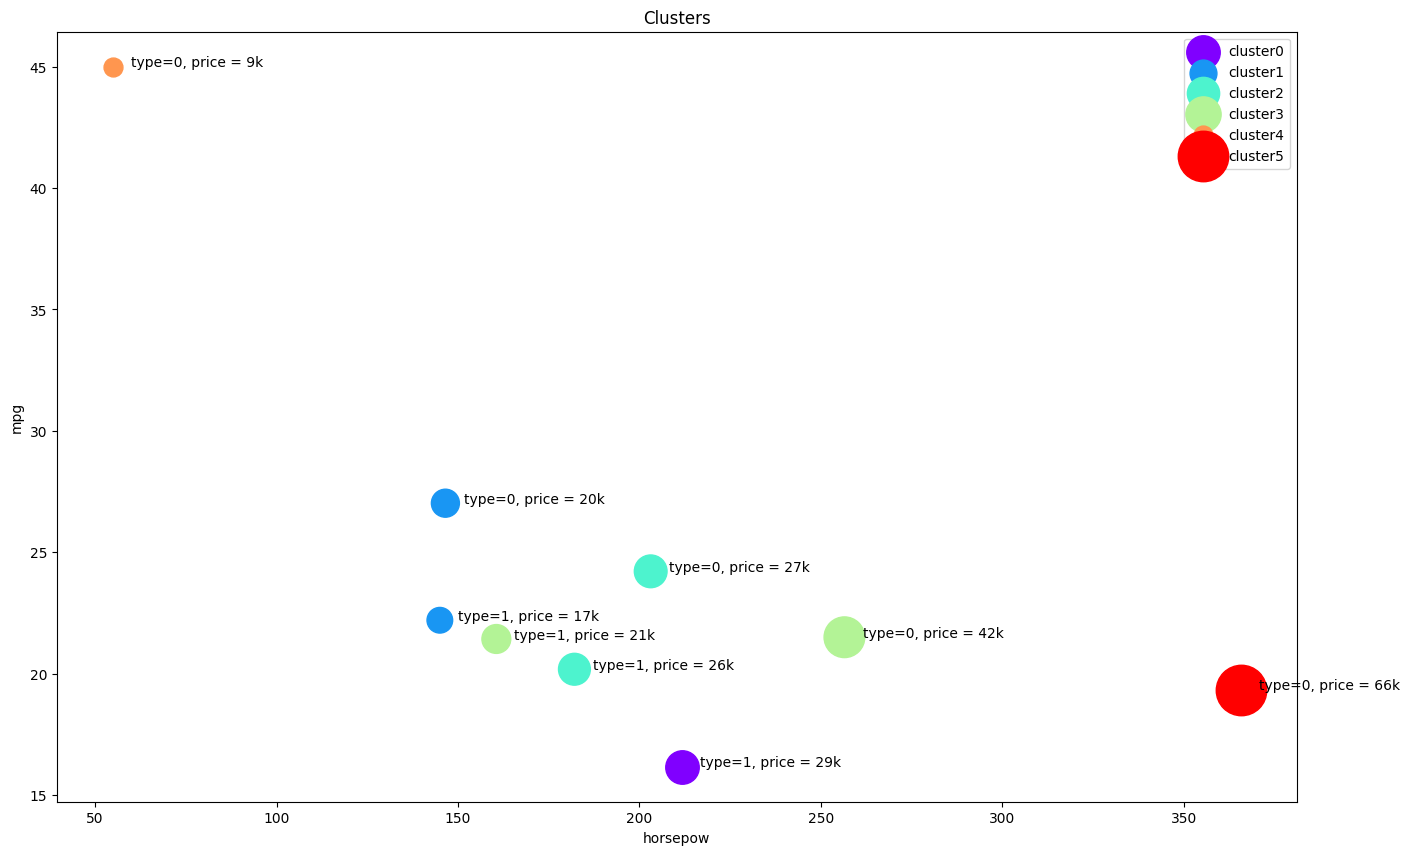

In [83]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

#3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset masing-masing! Jelaskan perbedaannya!

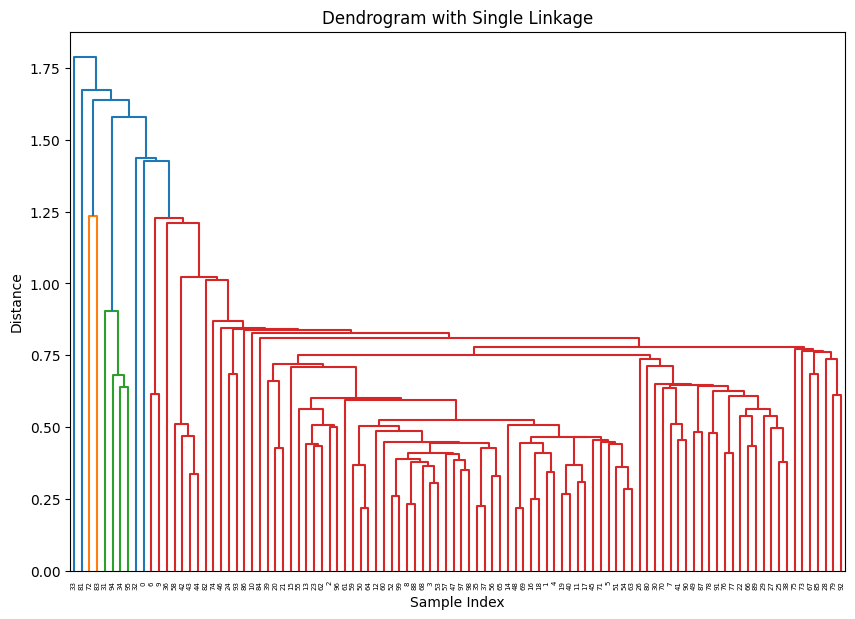

In [84]:
# Mengambil subset data untuk visualisasi (100 sampel pertama)
X_subset = X_scaled[:100]

# Single Linkage
linkage_single = linkage(X_subset, method='single')
plot_dendrogram(linkage_single, 'Dendrogram with Single Linkage')

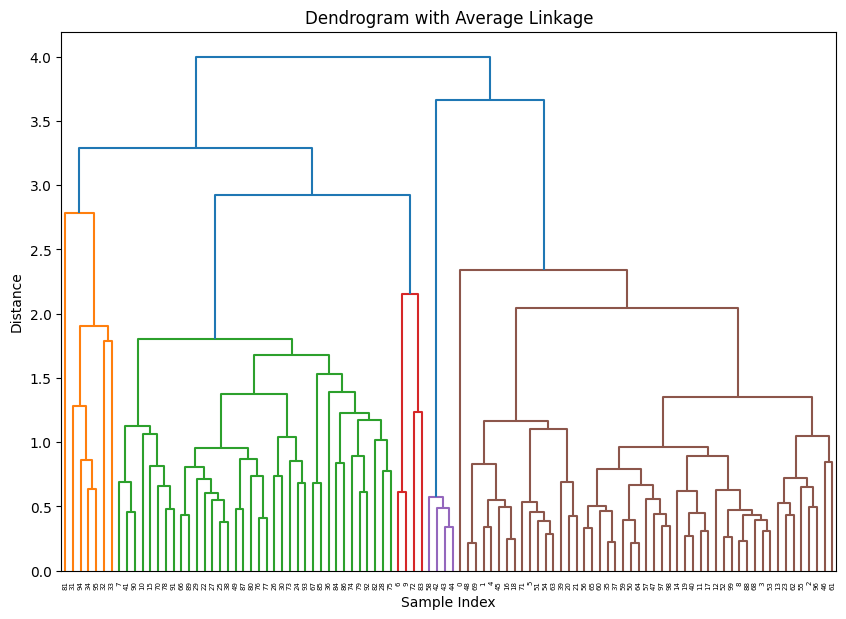

In [85]:
# Average Linkage
linkage_average = linkage(X_subset, method='average')
plot_dendrogram(linkage_average, 'Dendrogram with Average Linkage')

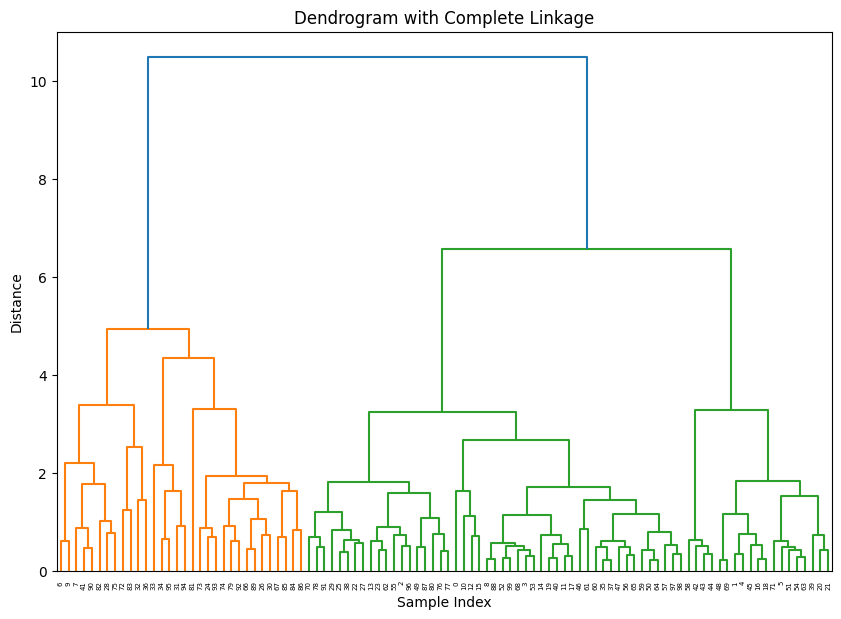

In [86]:
# Complete Linkage
linkage_complete = linkage(X_subset, method='complete')
plot_dendrogram(linkage_complete, 'Dendrogram with Complete Linkage')

Perbedaan :

* Single Linkage: Menggunakan jarak minimum antara dua cluster. Metode ini cenderung membentuk cluster yang "berantai" (chaining effect) karena hanya mempertimbangkan jarak terdekat antar cluster.


* Average Linkage: Menggunakan rata-rata jarak antara semua pasangan titik dari dua cluster. Metode ini memberikan hasil yang lebih seimbang dibandingkan single linkage.


* Complete Linkage: Menggunakan jarak maksimum antara dua cluster. Metode ini cenderung membentuk cluster yang lebih kompak dan ukuran yang relatif sama.

In [87]:
# Membandingkan hasil clustering dengan n_clusters=3
def perform_clustering(X, method, n_clusters=3):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels = clustering.fit_predict(X)
    return labels

# Lakukan clustering dengan ketiga metode
single_labels = perform_clustering(X_scaled, 'single')
average_labels = perform_clustering(X_scaled, 'average')
complete_labels = perform_clustering(X_scaled, 'complete')

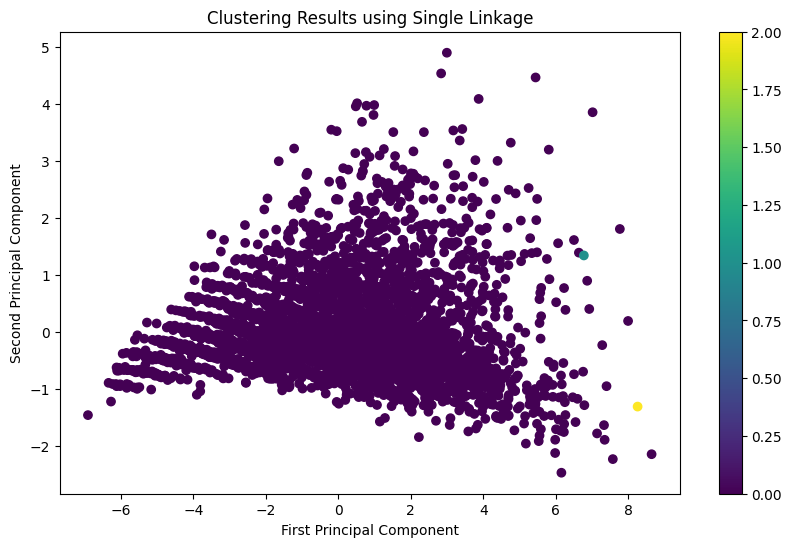

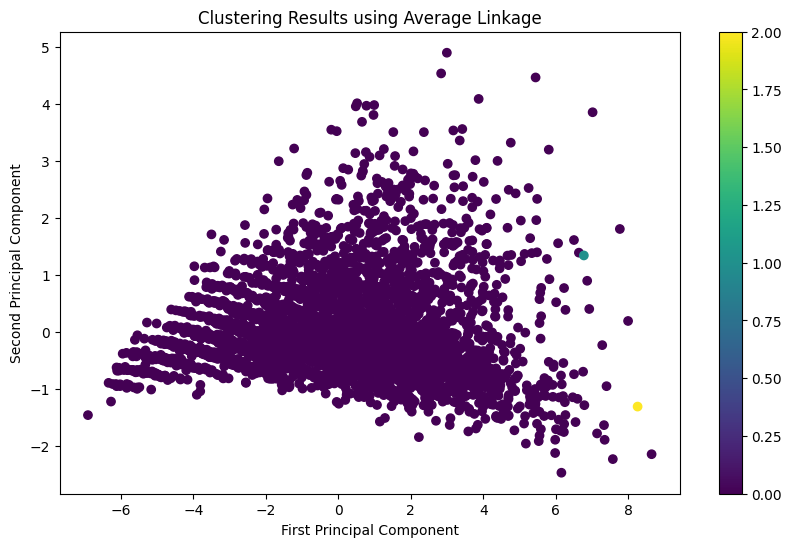

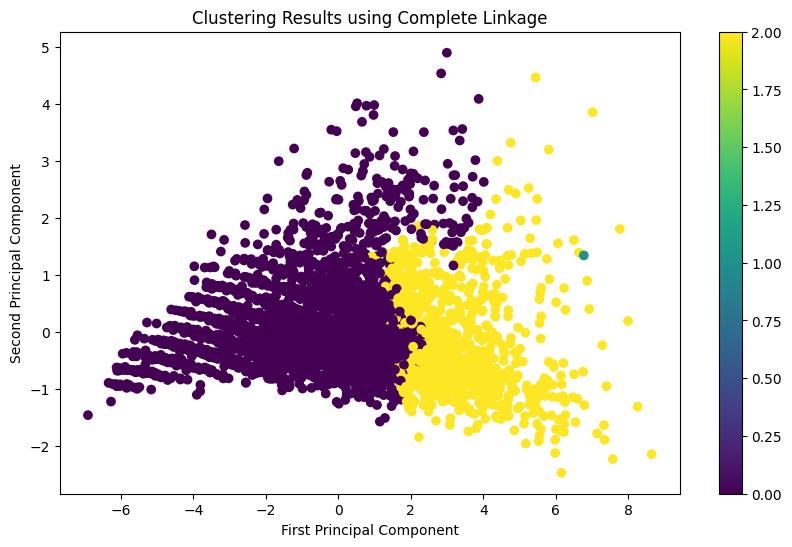


Analisis Perbandingan Metode Clustering:
----------------------------------------

Single Linkage:
Silhouette Score: 0.679

Ukuran cluster untuk Single Linkage:
Cluster 0: 4175 sampel (99.95%)
Cluster 1: 1 sampel (0.02%)
Cluster 2: 1 sampel (0.02%)

Average Linkage:
Silhouette Score: 0.679

Ukuran cluster untuk Average Linkage:
Cluster 0: 4175 sampel (99.95%)
Cluster 1: 1 sampel (0.02%)
Cluster 2: 1 sampel (0.02%)

Complete Linkage:
Silhouette Score: 0.376

Ukuran cluster untuk Complete Linkage:
Cluster 0: 3184 sampel (76.23%)
Cluster 1: 1 sampel (0.02%)
Cluster 2: 992 sampel (23.75%)


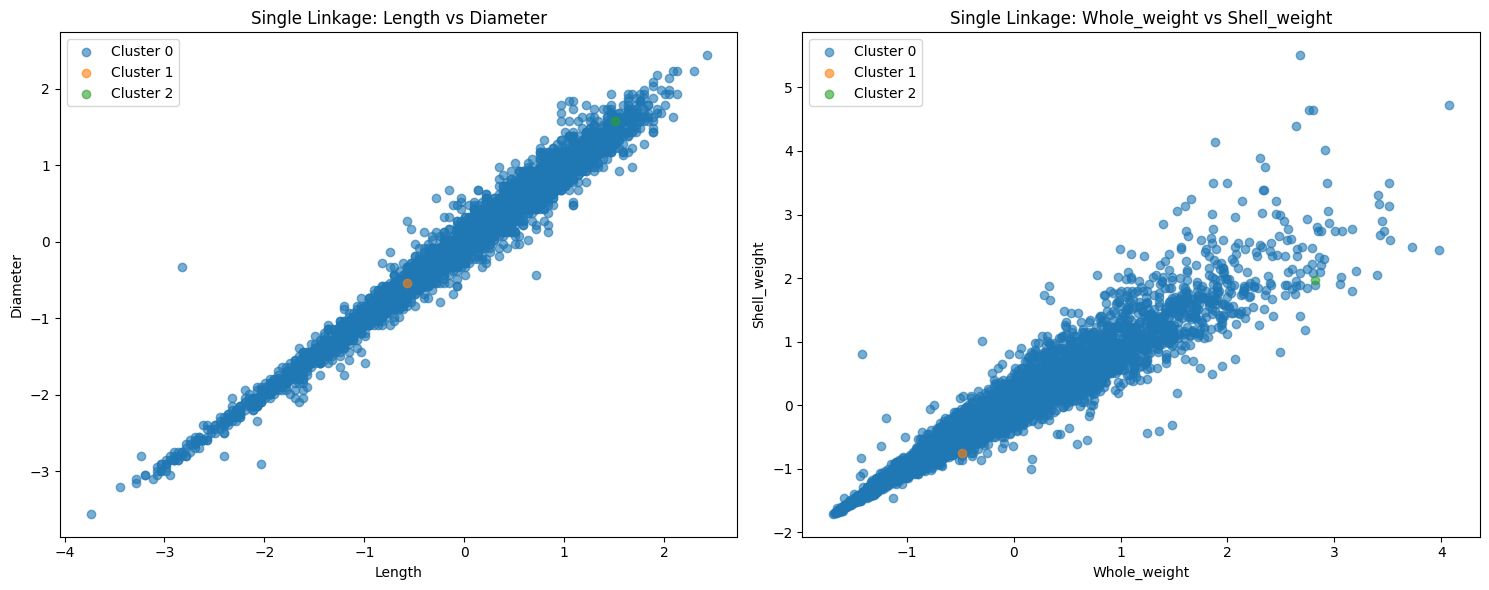

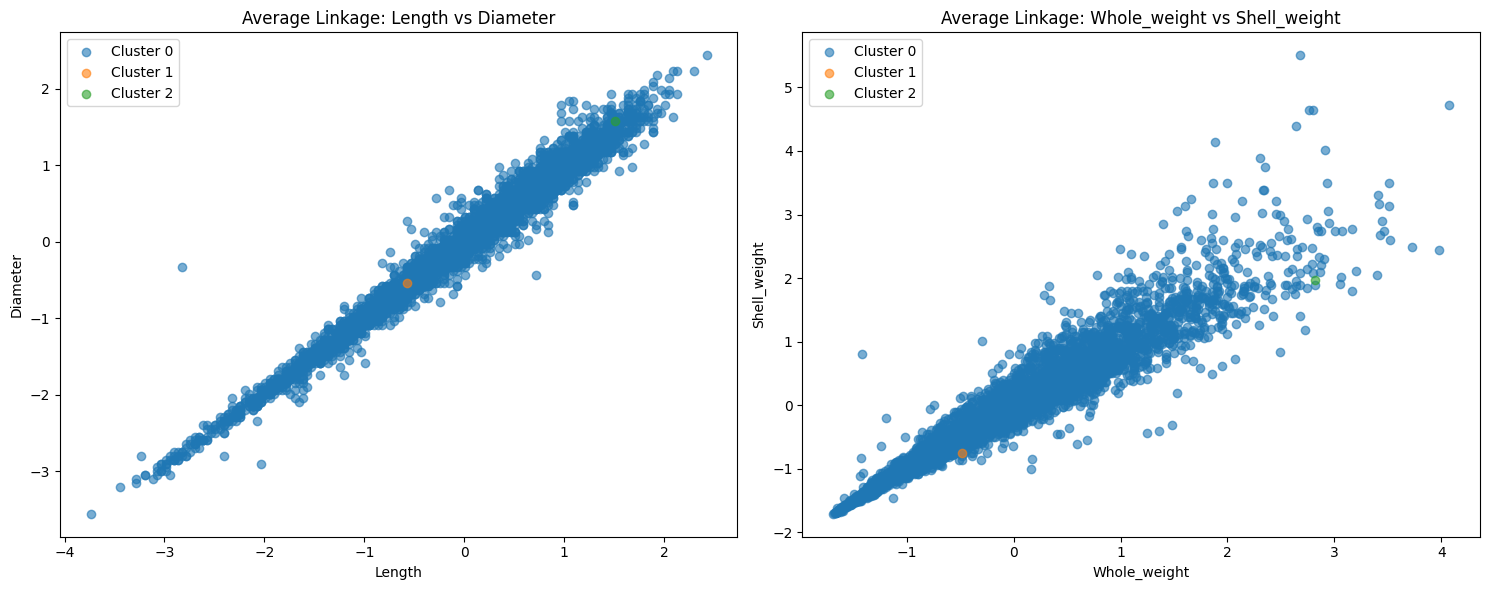

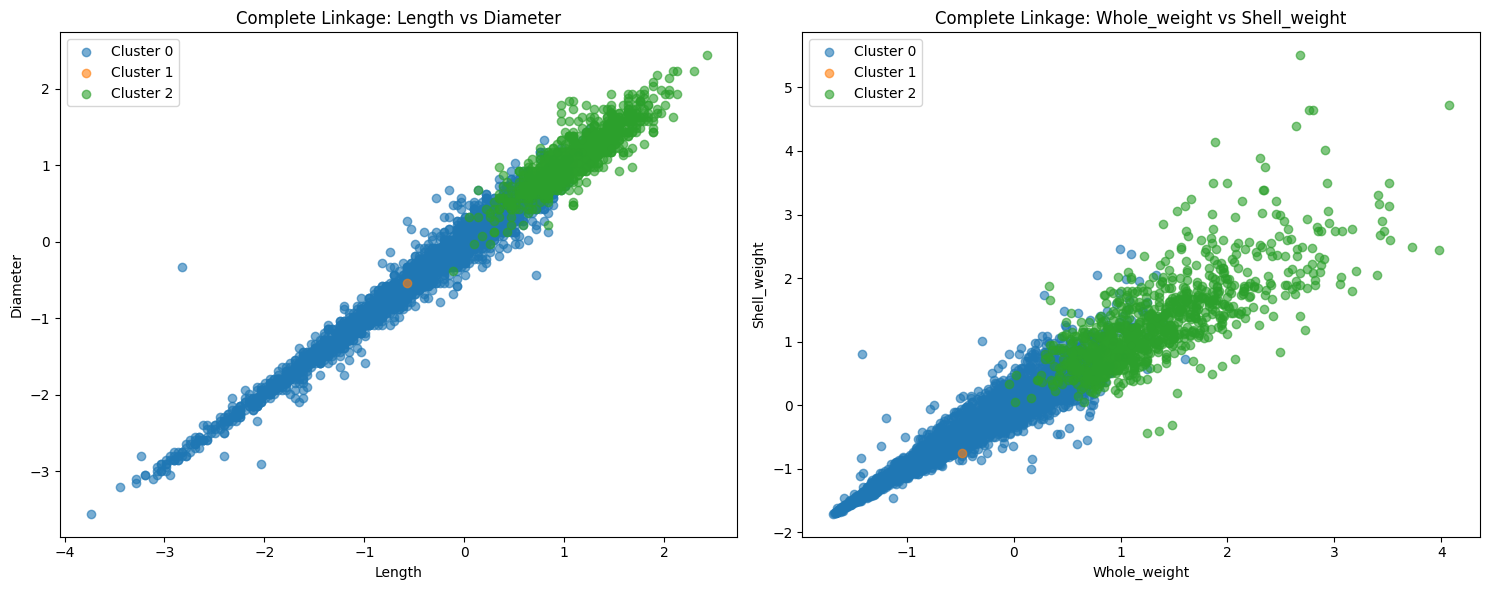

In [88]:
# Fungsi untuk visualisasi hasil clustering menggunakan PCA
def visualize_clusters(X, labels, title):
    # Reduksi dimensi menggunakan PCA untuk visualisasi
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot hasil
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f'Clustering Results using {title}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

# Visualisasi hasil clustering untuk setiap metode
visualize_clusters(X_scaled, single_labels, 'Single Linkage')
visualize_clusters(X_scaled, average_labels, 'Average Linkage')
visualize_clusters(X_scaled, complete_labels, 'Complete Linkage')

# Analisis ukuran cluster
def analyze_cluster_sizes(labels, method_name):
    cluster_sizes = Counter(labels)
    print(f"\nUkuran cluster untuk {method_name}:")
    for cluster_id, size in sorted(cluster_sizes.items()):
        print(f"Cluster {cluster_id}: {size} sampel ({size/len(labels)*100:.2f}%)")

# Hitung dan tampilkan metrik evaluasi
print("\nAnalisis Perbandingan Metode Clustering:")
print("----------------------------------------")

for labels, method in zip([single_labels, average_labels, complete_labels],
                        ['Single Linkage', 'Average Linkage', 'Complete Linkage']):
    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"\n{method}:")
    print(f"Silhouette Score: {silhouette_avg:.3f}")

    # Analisis ukuran cluster
    analyze_cluster_sizes(labels, method)

# Visualisasi perbandingan distribusi fitur antar cluster
def plot_feature_distributions(X, labels, method_name):
    plt.figure(figsize=(15, 6))

    # Pilih dua fitur untuk visualisasi
    feature_pairs = [('Length', 'Diameter'), ('Whole_weight', 'Shell_weight')]

    for idx, (feat1, feat2) in enumerate(feature_pairs, 1):
        plt.subplot(1, 2, idx)
        for cluster in range(3):
            mask = labels == cluster
            plt.scatter(X[mask, numeric_features.get_loc(feat1)],
                       X[mask, numeric_features.get_loc(feat2)],
                       label=f'Cluster {cluster}',
                       alpha=0.6)
        plt.xlabel(feat1)
        plt.ylabel(feat2)
        plt.title(f'{method_name}: {feat1} vs {feat2}')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Visualisasi distribusi fitur untuk setiap metode
plot_feature_distributions(X_scaled, single_labels, 'Single Linkage')
plot_feature_distributions(X_scaled, average_labels, 'Average Linkage')
plot_feature_distributions(X_scaled, complete_labels, 'Complete Linkage')

#4. ⁠Lakukan Principal Component Analysis untuk dataset!

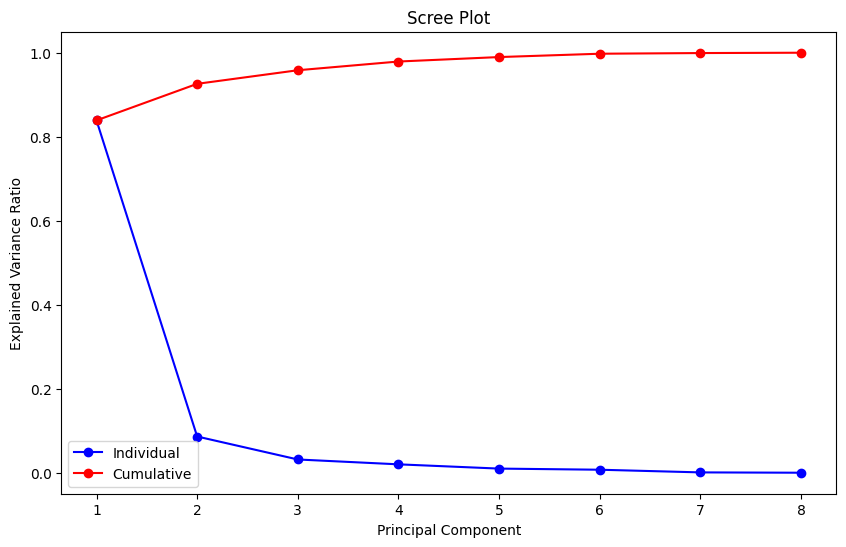


Kontribusi variansi dari setiap komponen utama:
PC1: 0.8391 (83.91%)
PC2: 0.0870 (8.70%)
PC3: 0.0323 (3.23%)
PC4: 0.0207 (2.07%)
PC5: 0.0106 (1.06%)
PC6: 0.0079 (0.79%)
PC7: 0.0016 (0.16%)
PC8: 0.0008 (0.08%)


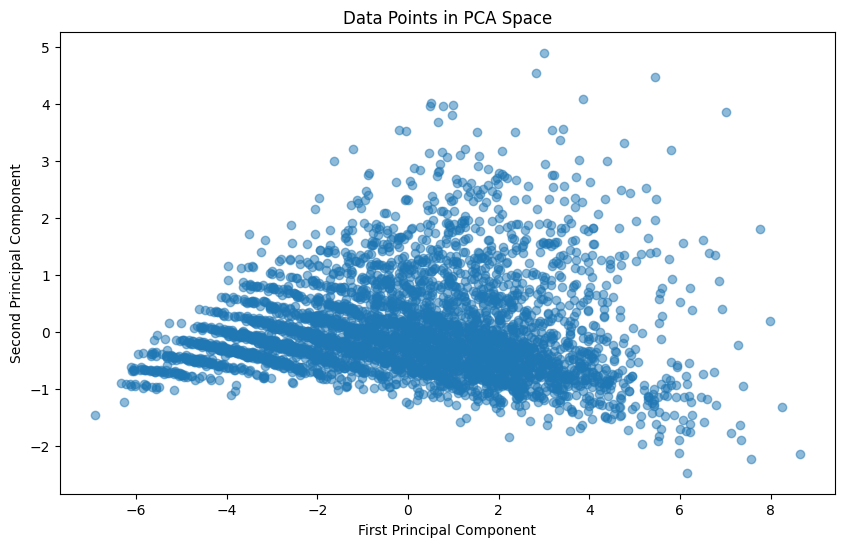


Loading factors (koefisien komponen utama):
                     PC1       PC2       PC3       PC4       PC5       PC6  \
Length          0.372139 -0.068283  0.031070  0.604054 -0.011125  0.047497   
Diameter        0.373094 -0.040048  0.041005  0.587595  0.057911  0.023375   
Height          0.340027  0.070463  0.899706 -0.256777 -0.056729 -0.026691   
Whole_weight    0.378307 -0.137346 -0.206194 -0.241849  0.015656 -0.117255   
Shucked_weight  0.362454 -0.298840 -0.208286 -0.183246 -0.398525 -0.624893   
Viscera_weight  0.368558 -0.172979 -0.197380 -0.265221 -0.309821  0.765844   
Shell_weight    0.370758  0.045400 -0.161574 -0.244192  0.830564 -0.032832   
Rings           0.242713  0.921204 -0.192144 -0.043310 -0.220026 -0.068196   

                     PC7       PC8  
Length         -0.698826  0.016349  
Diameter        0.712985 -0.000219  
Height         -0.008614  0.002688  
Whole_weight    0.008331  0.850264  
Shucked_weight  0.009282 -0.391101  
Viscera_weight  0.027346 -0.20

In [89]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Hitung explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(['Individual', 'Cumulative'])
plt.show()

# Tampilkan hasil komponen utama pertama
print("\nKontribusi variansi dari setiap komponen utama:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

# Visualisasi data dalam ruang PCA (2 komponen pertama)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data Points in PCA Space')
plt.show()

# Tampilkan loading factors
components_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=numeric_features
)
print("\nLoading factors (koefisien komponen utama):")
print(components_df)